This assignment makes use of a data file that contains measurements of different parts of a flower. According to the measurements of these parts, flowers are then categorized into one of three classes. The relevant parts that are measured to determine the class of the flower are:
* The sepal length.
* The sepal width.
* The petal length.
* The petal width.

Sepals typically function as protection for the flower in bud, and often as support for the petals when in bloom.
You are expected to create a model that will be able to classify a flowers by class when given the measurments for the sepals and petals.

**1.** Read the data file "flowers.csv" into a dataframe called "flowers". The columns contain the following information:
* Column 1: sepal length.
* Column 2: sepal width.
* Column 3: petal length.
* Column 4: petal width.
* Column 5: class.

Name the columns accordingly.

[2 Marks]

In [179]:
import pandas as pd
flowers = pd.read_csv('flowers.csv',names = ["SepalLength","SepalWidth","PetalLength","PetalWidth","Class"])
print(flowers)

     SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
151          6.3         2.5          5.0         1.9  Iris-virginica
152          6.5         3.0          5.2         2.0  Iris-virginica
153          6.2         3.4          5.4         2.3  Iris-virginica
154          5.9         3.0          5.1         1.8  Iris-virginica
155         76.0        34.0         59.0        23.0  Iris-virginica

[156 rows x 5 columns]


**2.** Check the data for any faulty values and handle all the data errors by cleaning the data. Show the data before and after it has been cleaned.

[4 Marks]

In [180]:
#Dropping all outliers

#SL - Sepal Length
#SW - Sepal Width
#PL - Petal Length
#PW - Petal Width
print('Before cleaning\n:',flowers)
#Sepal Length 
SL = flowers['SepalLength']
flowers.drop(SL.index[
    (SL > (SL.median() +3*SL.std()))&
    (SL > (SL.median() -3*SL.std()))
],inplace=True)

#Sepal Width
SW = flowers['SepalWidth']
flowers.drop(SW.index[
    (SW > (SW.median() +3*SW.std()))&
    (SW > (SW.median() -3*SW.std()))
],inplace=True)

#Petal Length
PL = flowers['PetalLength']
flowers.drop(PL.index[
    (PL > (PL.median() +3*PL.std()))&
    (PL > (PL.median() -3*PL.std()))
],inplace=True)

#Petal Width
PW = flowers['PetalWidth']
flowers.drop(PW.index[
    (PW > (PW.median() +3*PW.std()))&
    (PW > (PW.median() -3*PW.std()))
],inplace=True)



print('After cleaning\n:',flowers)




Before cleaning
:      SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
151          6.3         2.5          5.0         1.9  Iris-virginica
152          6.5         3.0          5.2         2.0  Iris-virginica
153          6.2         3.4          5.4         2.3  Iris-virginica
154          5.9         3.0          5.1         1.8  Iris-virginica
155         76.0        34.0         59.0        23.0  Iris-virginica

[156 rows x 5 columns]
After cleaning
:      SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5   

**3.** Summarize the dataset by:
* Getting the dimentions of the dataset
* Looking at (Displaying) the content of the dataset.
* Generating a statistical summary of all the attributes.
* Providing a breakdown of the data by class variable.

[4 Marks]

In [181]:
print(flowers.shape)
print(flowers)
print(flowers.describe())
print(flowers.groupby('Class').mean())

(149, 5)
     SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
150          6.7         3.0          5.2         2.3  Iris-virginica
151          6.3         2.5          5.0         1.9  Iris-virginica
152          6.5         3.0          5.2         2.0  Iris-virginica
153          6.2         3.4          5.4         2.3  Iris-virginica
154          5.9         3.0          5.1         1.8  Iris-virginica

[149 rows x 5 columns]
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.844

**4.** Visualise the data by creating:
* Univariate plots (i.e. box plots and histograms) to better understand each attribute.
* Multivariate plots (i.e. scatterplots for all attribute pairs) to better understand the relationships between attributes.

[6 Marks]

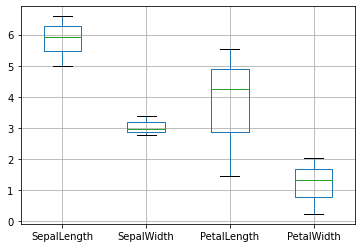

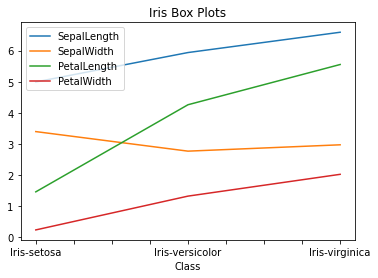

In [190]:
#Box Plots

flowerMeans = flowers.groupby(["Class"]).mean()

flowerMeans.boxplot(column = ['SepalLength','SepalWidth', 'PetalLength','PetalWidth'])

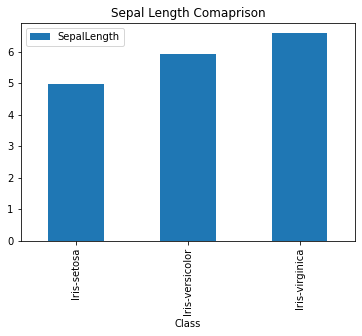

In [194]:
sepalLengthMeans = flowers[["SepalLength",'Class']].groupby(["Class"]).mean()
sepalLengthMeans.plot(kind = 'bar',title='Sepal Length Comaprison')

Univariate distribution of Observations


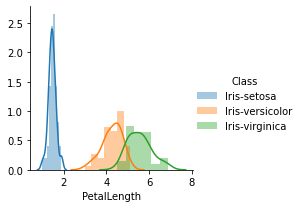

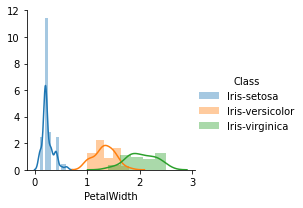

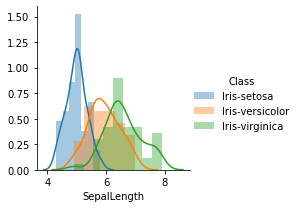

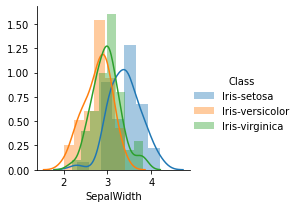

In [196]:
import seaborn as sns
print('Univariate distribution of Observations')
sns.FacetGrid(flowers,hue="Class",height=3).map(sns.distplot,"PetalLength").add_legend()
sns.FacetGrid(flowers,hue="Class",height=3).map(sns.distplot,"PetalWidth").add_legend()
sns.FacetGrid(flowers,hue="Class",height=3).map(sns.distplot,"SepalLength").add_legend()
sns.FacetGrid(flowers,hue="Class",height=3).map(sns.distplot,"SepalWidth").add_legend()


Text(0.5, 1.0, 'Scatterplot of flower classes')

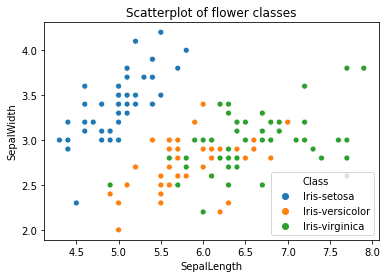

In [193]:
sns.scatterplot(x='SepalLength', y='SepalWidth', hue='Class', data=flowers).set_title('Scatterplot of flower classes')


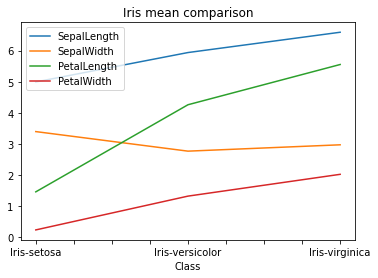

In [191]:
flowerMeans.plot(title = "Iris mean comparison")

**5.** Randomly split the dataset into training and testing data with a test data size of 20%. Display the dimentions of the training and testing datasets respectively.

[8 Marks]

In [150]:
from sklearn.model_selection import train_test_split

x = flowers.iloc[:,:-1]
y = flowers.iloc[:,4]
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print('Training shape for x:',x_train.shape)
print('Testing shape for x:',x_test.shape)
print('Training shape for y:',y_train.shape)
print('Testing shape for y:',y_test.shape)


Training shape for x: (119, 4)
Testing shape for x: (30, 4)
Training shape for y: (119,)
Testing shape for y: (30,)


**6.** Build and evaluate different models:
* Train the following algorithms:
    - Logistic Regression.
    - K-Nearest Neighbour.
    - Decision Tree.
    - Suport Vector Machines.
* Determine the best model by using 10-fold cross-validation.
    - Provide the accuracy score, confusion matrix and classification report for each model.
    
[14 Marks]

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Logistic regression
LogisticClassifier = LogisticRegression()
LogisticClassifier.fit(x_train, y_train)
Logisticy_pred = classifier.predict(x_test)
print('Logistic Regression:\n')
print('Classification Report:\n',classification_report(y_test,Logisticy_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,Logisticy_pred))
print('Accuracy Score:\n',accuracy_score(Logisticy_pred,y_test))



Logistic Regression:

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[ 7  0  0]
 [ 0  9  0]
 [ 0  0 14]]
Accuracy Score:
 1.0


In [170]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors = 8)
KNNclassifier.fit(x_train,y_train)
KNNy_pred = classifier.predict(x_test)
print('Classification Report:\n',classification_report(y_test, KNNy_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, KNNy_pred))
print('Accuracy Score:\n',accuracy_score(KNNy_pred,y_test))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.90        30
      macro avg       0.91      0.92      0.91        30
   weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[ 7  0  0]
 [ 0  8  1]
 [ 0  2 12]]
Accuracy Score:
 0.9


In [171]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(x_train, y_train)
DTy_pred = classifier.predict(x_test)
print('Classification Report:\n',classification_report(y_test, DTy_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, DTy_pred))
print('Accuracy Score:\n',accuracy_score(DTy_pred,y_test))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[ 7  0  0]
 [ 0  8  1]
 [ 0  0 14]]
Accuracy Score:
 0.9666666666666667


In [174]:
#Support vector machines
from sklearn.svm import SVC
SVCclassifier = SVC()
SVCclassifier.fit(x_train,y_train)

SVCy_pred = classifier.predict(x_test)
print('Classification Report:\n',classification_report(y_test, SVCy_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, SVCy_pred))
print('Accuracy Score:\n',accuracy_score(SVCy_pred,y_test))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
 [[ 7  0  0]
 [ 0  9  0]
 [ 0  2 12]]
Accuracy Score:
 0.9333333333333333


**7.** Compare the accuracy of the models by plotting the box plots for each model next to each other.

[2 Marks]